## Logistics Regression

### Importing all Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [5]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Logistic Regression model on the Training set

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns

In [6]:
dataset


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [13]:
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))
    
    
def classification(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, map_=True):
    classifier = model
    classifier.fit(X_train,y_train)
    test_pred = classifier.predict(X_test)
    train_pred = classifier.predict(X_train)
    print(model,'\n')
    metrics(y_test,test_pred)
    
    if map_:
    #-------TRAIN Visualization-------#
        X_set, y_set = sc.inverse_transform(X_train), y_train
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
        plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
        plt.title('Training set')
        plt.xlabel('Age')
        plt.ylabel('Estimated Salary')
        plt.legend()
        plt.show()
    
    #-------TEST Visualization-------#
        X_set, y_set = sc.inverse_transform(X_test), y_test
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
        plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
        plt.title('Test set')
        plt.xlabel('Age')
        plt.ylabel('Estimated Salary')
        plt.legend()
        plt.show()

LogisticRegression() 

Confusion Matrix:
 [[65  3]
 [ 8 24]]


Accuracy Score:
 0.89


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


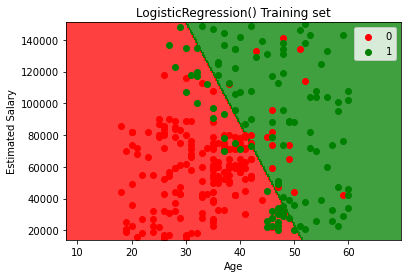

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


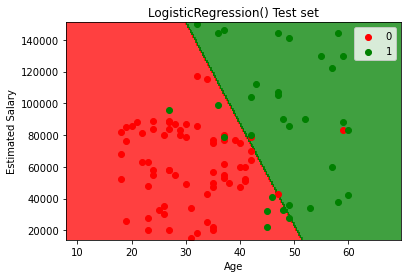

In [41]:
classification(LogisticRegression())

### K-Nearest Neighbours

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classification(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),map_=False)

KNeighborsClassifier() 

Confusion Matrix:
 [[64  4]
 [ 3 29]]


Accuracy Score:
 0.93


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [15]:
classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


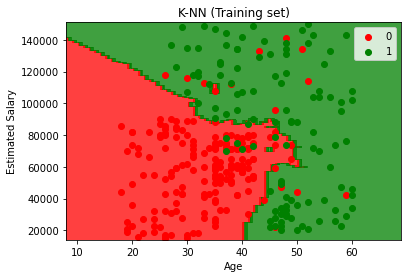

In [16]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


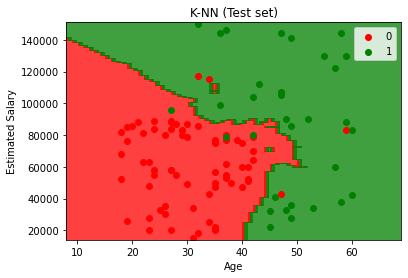

In [24]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* Accuracy score of KNN prediction increased compared to Logistic Regression

### Naive-Bayes

GaussianNB() 

Confusion Matrix:
 [[65  3]
 [ 7 25]]


Accuracy Score:
 0.9


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


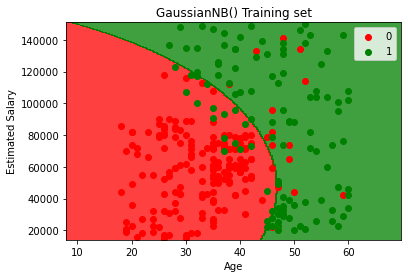

In [ ]:
from sklearn.naive_bayes import GaussianNB

classification(GaussianNB())

### Support Vector Machine

SVC(kernel='linear', random_state=0) 

Confusion Matrix:
 [[66  2]
 [ 8 24]]


Accuracy Score:
 0.9


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


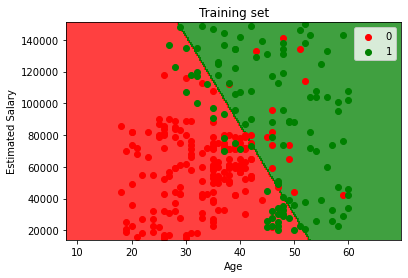

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


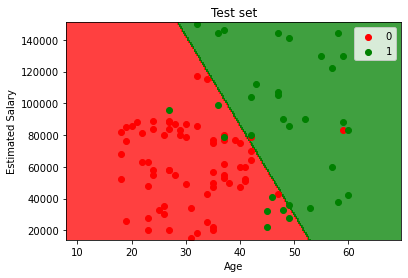

In [31]:
from sklearn.svm import SVC
classification(SVC(kernel = 'linear', random_state = 0))

### Kernel SVM

SVC(random_state=0) 

Confusion Matrix:
 [[64  4]
 [ 3 29]]


Accuracy Score:
 0.93


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


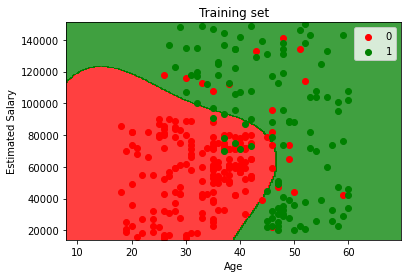

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


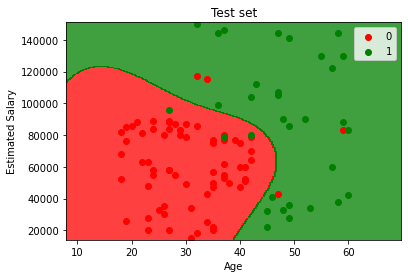

In [32]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classification(classifier)

### Decision Tree

DecisionTreeClassifier(criterion='entropy', random_state=0) 

Confusion Matrix:
 [[62  6]
 [ 3 29]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


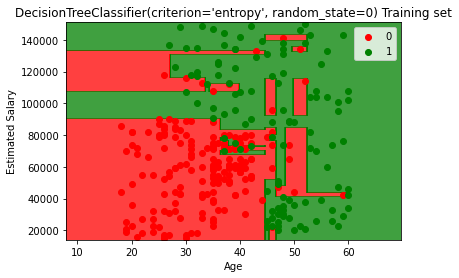

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


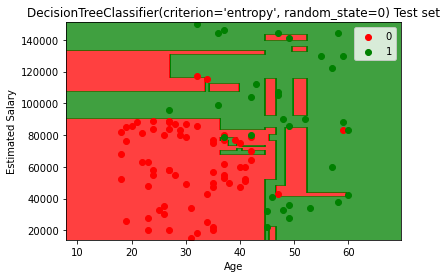

In [9]:
from sklearn.tree import DecisionTreeClassifier
classification(DecisionTreeClassifier(criterion = 'entropy', random_state = 0))

### Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier(random_state=0) 

Confusion Matrix:
 [[63  5]
 [ 4 28]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


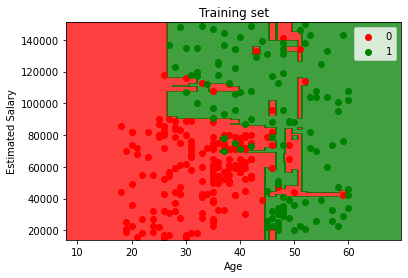

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


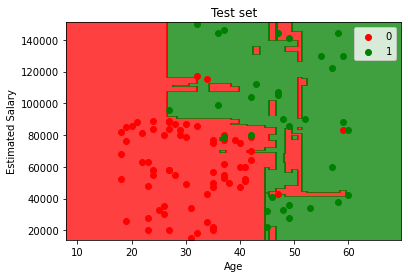

In [14]:
classification(BaggingClassifier(random_state=0))

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) 

Confusion Matrix:
 [[63  5]
 [ 4 28]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


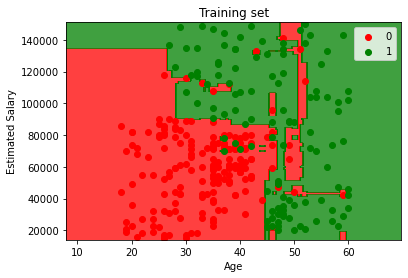

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


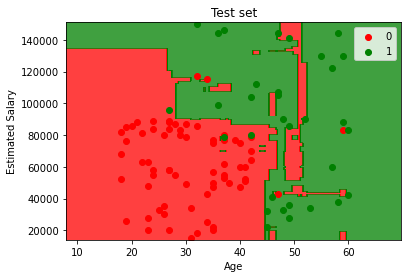

In [17]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classification(model)

### Ada Boost

In [18]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

AdaBoostClassifier() 

Confusion Matrix:
 [[64  4]
 [ 5 27]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


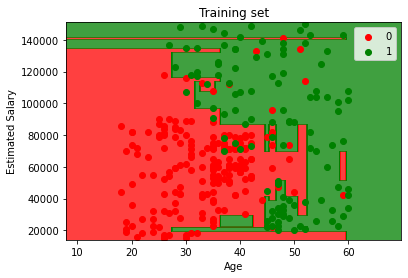

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


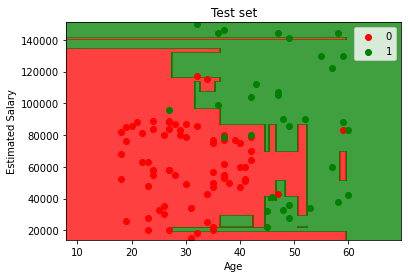

In [19]:
classification(model)

### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier() 

Confusion Matrix:
 [[64  4]
 [ 5 27]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


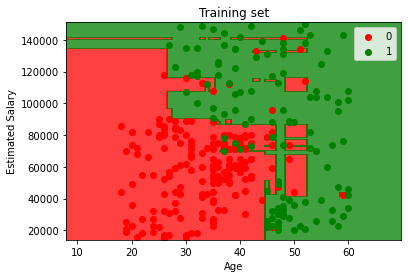

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


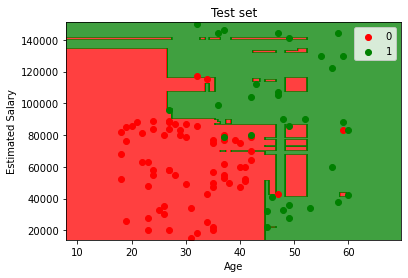

In [21]:
model = GradientBoostingClassifier()

classification(model)

### XG Boost

In [22]:
from xgboost import XGBClassifier

In [23]:
model = XGBClassifier()

[20:18:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

Confusion Matrix:
 [[62  6]
 [ 4 28]]


Accuracy Score:
 0.9


Classification Report: 
               precision    recall  f1-score   support

           0       0.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


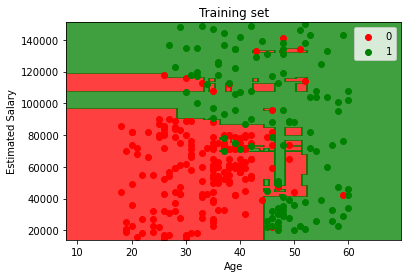

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


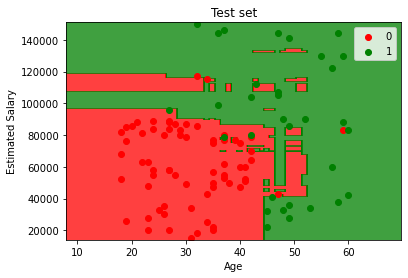

In [24]:
classification(model)

### Light GBM

In [25]:
from lightgbm import LGBMClassifier

LGBMClassifier() 

Confusion Matrix:
 [[64  4]
 [ 5 27]]


Accuracy Score:
 0.91


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


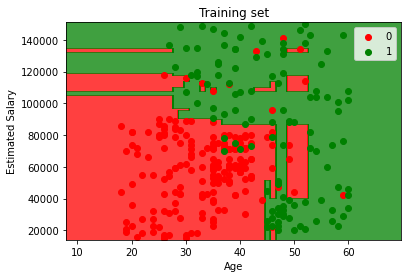

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


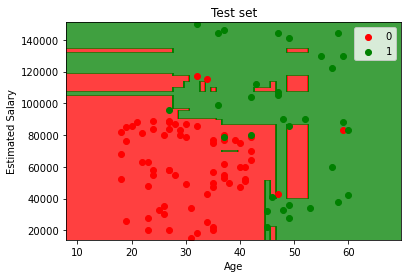

In [26]:
model = LGBMClassifier()

classification(model)

### CAT Boost

In [27]:
from catboost import CatBoostClassifier

Learning rate set to 0.006161
0:	learn: 0.6872926	total: 54.6ms	remaining: 54.6s
1:	learn: 0.6799471	total: 55.7ms	remaining: 27.8s
2:	learn: 0.6721264	total: 56.8ms	remaining: 18.9s
3:	learn: 0.6652568	total: 57.8ms	remaining: 14.4s
4:	learn: 0.6586874	total: 59.8ms	remaining: 11.9s
5:	learn: 0.6522441	total: 63.7ms	remaining: 10.5s
6:	learn: 0.6454735	total: 64.9ms	remaining: 9.21s
7:	learn: 0.6390894	total: 66ms	remaining: 8.19s
8:	learn: 0.6318089	total: 67.2ms	remaining: 7.4s
9:	learn: 0.6250851	total: 68.4ms	remaining: 6.77s
10:	learn: 0.6185944	total: 69.5ms	remaining: 6.25s
11:	learn: 0.6135007	total: 70.8ms	remaining: 5.83s
12:	learn: 0.6077418	total: 71.9ms	remaining: 5.46s
13:	learn: 0.6017832	total: 73.1ms	remaining: 5.14s
14:	learn: 0.5956528	total: 74.2ms	remaining: 4.87s
15:	learn: 0.5906843	total: 75.2ms	remaining: 4.63s
16:	learn: 0.5861526	total: 76.3ms	remaining: 4.41s
17:	learn: 0.5807810	total: 77.8ms	remaining: 4.25s
18:	learn: 0.5758800	total: 80.9ms	remaining: 4

233:	learn: 0.2374063	total: 330ms	remaining: 1.08s
234:	learn: 0.2369356	total: 331ms	remaining: 1.08s
235:	learn: 0.2365469	total: 332ms	remaining: 1.08s
236:	learn: 0.2362167	total: 334ms	remaining: 1.07s
237:	learn: 0.2359681	total: 335ms	remaining: 1.07s
238:	learn: 0.2356297	total: 336ms	remaining: 1.07s
239:	learn: 0.2352665	total: 337ms	remaining: 1.07s
240:	learn: 0.2349198	total: 338ms	remaining: 1.06s
241:	learn: 0.2345959	total: 339ms	remaining: 1.06s
242:	learn: 0.2341997	total: 340ms	remaining: 1.06s
243:	learn: 0.2339507	total: 341ms	remaining: 1.06s
244:	learn: 0.2336032	total: 343ms	remaining: 1.05s
245:	learn: 0.2332048	total: 344ms	remaining: 1.05s
246:	learn: 0.2328792	total: 345ms	remaining: 1.05s
247:	learn: 0.2326219	total: 346ms	remaining: 1.05s
248:	learn: 0.2323691	total: 347ms	remaining: 1.05s
249:	learn: 0.2320811	total: 348ms	remaining: 1.04s
250:	learn: 0.2317168	total: 350ms	remaining: 1.04s
251:	learn: 0.2314698	total: 351ms	remaining: 1.04s
252:	learn: 

540:	learn: 0.1854709	total: 660ms	remaining: 560ms
541:	learn: 0.1853575	total: 662ms	remaining: 559ms
542:	learn: 0.1852632	total: 663ms	remaining: 558ms
543:	learn: 0.1851468	total: 664ms	remaining: 557ms
544:	learn: 0.1850272	total: 665ms	remaining: 556ms
545:	learn: 0.1848936	total: 667ms	remaining: 554ms
546:	learn: 0.1848006	total: 668ms	remaining: 553ms
547:	learn: 0.1847354	total: 669ms	remaining: 552ms
548:	learn: 0.1846432	total: 670ms	remaining: 550ms
549:	learn: 0.1845814	total: 671ms	remaining: 549ms
550:	learn: 0.1844802	total: 672ms	remaining: 548ms
551:	learn: 0.1843256	total: 673ms	remaining: 546ms
552:	learn: 0.1842756	total: 674ms	remaining: 545ms
553:	learn: 0.1841768	total: 676ms	remaining: 544ms
554:	learn: 0.1840823	total: 677ms	remaining: 543ms
555:	learn: 0.1840568	total: 678ms	remaining: 541ms
556:	learn: 0.1838913	total: 679ms	remaining: 540ms
557:	learn: 0.1838468	total: 680ms	remaining: 539ms
558:	learn: 0.1837858	total: 681ms	remaining: 537ms
559:	learn: 

705:	learn: 0.1706870	total: 826ms	remaining: 344ms
706:	learn: 0.1706161	total: 828ms	remaining: 343ms
707:	learn: 0.1705145	total: 829ms	remaining: 342ms
708:	learn: 0.1704415	total: 832ms	remaining: 341ms
709:	learn: 0.1702982	total: 833ms	remaining: 340ms
710:	learn: 0.1701875	total: 834ms	remaining: 339ms
711:	learn: 0.1701339	total: 835ms	remaining: 338ms
712:	learn: 0.1700759	total: 836ms	remaining: 337ms
713:	learn: 0.1700163	total: 838ms	remaining: 336ms
714:	learn: 0.1699016	total: 839ms	remaining: 334ms
715:	learn: 0.1697750	total: 840ms	remaining: 333ms
716:	learn: 0.1696717	total: 842ms	remaining: 332ms
717:	learn: 0.1695689	total: 843ms	remaining: 331ms
718:	learn: 0.1695198	total: 844ms	remaining: 330ms
719:	learn: 0.1693972	total: 845ms	remaining: 329ms
720:	learn: 0.1692919	total: 846ms	remaining: 327ms
721:	learn: 0.1692209	total: 847ms	remaining: 326ms
722:	learn: 0.1691497	total: 848ms	remaining: 325ms
723:	learn: 0.1690880	total: 850ms	remaining: 324ms
724:	learn: 

867:	learn: 0.1578242	total: 993ms	remaining: 151ms
868:	learn: 0.1577669	total: 994ms	remaining: 150ms
869:	learn: 0.1577169	total: 996ms	remaining: 149ms
870:	learn: 0.1576814	total: 997ms	remaining: 148ms
871:	learn: 0.1575912	total: 998ms	remaining: 147ms
872:	learn: 0.1575643	total: 999ms	remaining: 145ms
873:	learn: 0.1574817	total: 1s	remaining: 144ms
874:	learn: 0.1573663	total: 1s	remaining: 143ms
875:	learn: 0.1573035	total: 1s	remaining: 142ms
876:	learn: 0.1572196	total: 1s	remaining: 141ms
877:	learn: 0.1571506	total: 1.01s	remaining: 140ms
878:	learn: 0.1570234	total: 1.01s	remaining: 139ms
879:	learn: 0.1569763	total: 1.01s	remaining: 138ms
880:	learn: 0.1568495	total: 1.01s	remaining: 136ms
881:	learn: 0.1567857	total: 1.01s	remaining: 135ms
882:	learn: 0.1566698	total: 1.01s	remaining: 134ms
883:	learn: 0.1566286	total: 1.01s	remaining: 133ms
884:	learn: 0.1565902	total: 1.01s	remaining: 132ms
885:	learn: 0.1564583	total: 1.02s	remaining: 131ms
886:	learn: 0.1563611	to

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


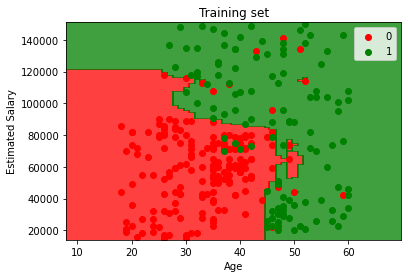

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


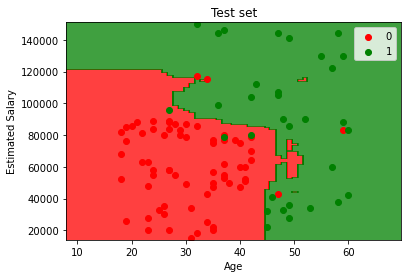

In [29]:
cat = CatBoostClassifier()

classification(cat)

#### Conclusion

* Out of all algorithms tried KNN, kernel-SVM and CAT boost gave better results when compared to other algorithms